<table>
    <tr>
        <td>
            <img src="extra/logo-mgu.png" width="150" height="150" />
        </td>
        <td>
        <img src="extra/logo-dep.png" width="150" height="150" />
        </td>
        <td>
            <center>
                <font size = 1>
                2017-2018, MОСКВА, МОСКОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ<br>
                ГЕОГРАФИЧЕСКИЙ ФАКУЛЬТЕТ, КАФЕДРА ФИЗИЧЕСКОЙ ГЕОГРАФИИ И ЛАНДШАФТОВЕДЕНИЯ<br><br>
                </font>
                <font size = 3>
                Материалы к курсовой работе<br> <b>Моделирование изменений землепользования и ландшафтного покрова</b><br><br>
                </font>
                <font size = 2>
                <b>Олег Железный</b><br>
                Руководитель В.М. Матасов
                </font>
            </center>
        </td>
    </tr>
</table>


Шапка данного проекта позаимствована у https://github.com/silenteddie/SCGIS_RS_Workshop, за что им большое спасибо.

In [3]:
# импортируем программные библиотеки, которые помогут нам работать со спутниковыми данными

# Основное средство - GDAL. Основной компонент работы с растровыми геоданными, который вообще везде
from osgeo import gdal

# matplotlib - самая большая и мощная библиотека визуализации данных в Python
import matplotlib.pyplot as plt
import matplotlib as mpl

# numpy - одна из главных математических библиотек Python. Быстрые вычисления матриц (а снимки - это матрицы)
import numpy as np

# Некоторые служебные команды. Так мы сможем смотреть на изображения прямо в jupyter notebook
from IPython.display import Image

# Настроим размер картинок, которые будет показывать jupyter notebook
mpl.rcParams['figure.figsize'] = (10,10)

In [4]:
#подгрузка пустых вероятностей
dataset0 = gdal.Open('Probability/Prob_0.asc')
dataset1 = gdal.Open('Probability/Prob_1.asc')
dataset2 = gdal.Open('Probability/Prob_2.asc')
dataset3 = gdal.Open('Probability/Prob_3.asc')

In [5]:
#determining raster size
X=dataset0.RasterXSize
Y=dataset0.RasterYSize

In [6]:
#для начала займёмся регрессией
#подгрузка гридов факторов (состояний)
drb=gdal.Open('Probability/Drivers/drb_R.asc').ReadAsArray()
drs=gdal.Open('Probability/Drivers/drs_R.asc').ReadAsArray()
ds1860=gdal.Open('Probability/Drivers/ds1860_R.asc').ReadAsArray()
tr=gdal.Open('Probability/Drivers/tr_R.asc').ReadAsArray()
wet=gdal.Open('Probability/Drivers/wet_R.asc').ReadAsArray()
catcharea=gdal.Open('Probability/Drivers/catcharea_R.asc').ReadAsArray()
catchslp=gdal.Open('Probability/Drivers/catchslp_R.asc').ReadAsArray()
gencur=gdal.Open('Probability/Drivers/gencur_R.asc').ReadAsArray()
mcatcharea=gdal.Open('Probability/Drivers/mcatcharea_R.asc').ReadAsArray()
plancur=gdal.Open('Probability/Drivers/plancur_R.asc').ReadAsArray()
profcur=gdal.Open('Probability/Drivers/profcur_R.asc').ReadAsArray()
slope=gdal.Open('Probability/Drivers/slope_R.asc').ReadAsArray()
tpi120=gdal.Open('Probability/Drivers/tpi120_R.asc').ReadAsArray()
z=gdal.Open('Probability/Drivers/z_R.asc').ReadAsArray()
tpi300=gdal.Open('Probability/Drivers/tpi300_R.asc').ReadAsArray()
tpi600=gdal.Open('Probability/Drivers/tpi600_R.asc').ReadAsArray()
tpi1200=gdal.Open('Probability/Drivers/tpi1200_R.asc').ReadAsArray()
dr19c=gdal.Open('Probability/Drivers/dr19c_R.asc').ReadAsArray()
aspect=gdal.Open('Probability/Drivers/aspect_R.asc').ReadAsArray()
dachi1860d=gdal.Open('Probability/Drivers/dachi1860d.asc').ReadAsArray()
swi=gdal.Open('Probability/Drivers/swi_R.asc').ReadAsArray()

</font>
<font size = 2>
Первый этап - составление растров вероятности каждого из типов землепользования. Для этого мы подгрузили растры различных факторов (выше) и файлы, которые мы будем заполнять числами. Первым делом переведём датасеты в матрицы. Дальше, поочерёдно обращаясь к каждой позиции в матрице (то есть каждому пикселю), рассчитаем для него значение вероятности, воспользовавшись коэффициентами бинарной логистической регрессии вида
</font>
<font size = 2>
$$log(P_{X,Y}/(1-P_{X,Y} ))=β_0+β_1 x_{1,X,Y}+β_2 x_{2,X,Y}+...+β_n x_{n,X,Y}=β_0+∑_{i=1}^n β_i x_{i,X,Y},$$            
</font>
<font size = 2>
где $P_{X,Y}$ – вероятность нахождения данного типа землепользования в пикселе с координатами $X$ и $Y$ (не путать: в коде Х и Y - это размер растра), $x_{i,X,Y}$ – значение $i$-го фактора LUCC в данном пикселе, $β_i$ – регрессионный коэффициент для $i$-ого фактора, $β_0$ – константа регрессии, $n$ – число факторов. Коэффиценты получены в резултате анализа в программе SPSS.


In [7]:
#probabilities
P0=dataset0.ReadAsArray()
P1=dataset1.ReadAsArray()
P2=dataset2.ReadAsArray()
P3=dataset3.ReadAsArray()
for i in range(0, Y):
    for j in range(0, X):
        if P0[i][j]!=-99999:
            P0[i][j]=1/(1/(2.718281828**(-3.933369-0.000106*drb[i][j]-0.000245*drs[i][j]+0.000779*ds1860[i][j]-0.433503*tr[i][j]+0.324471*wet[i][j]-2.8325E-7*catcharea[i][j]+20.875006*catchslp[i][j]+353.792464*gencur[i][j]+1.9441E-7*mcatcharea[i][j]+0.775873*plancur[i][j]-0.388095*slope[i][j]-0.951052*tpi120[i][j]+0.299351*tpi300[i][j]-0.217521*tpi600[i][j]+0.132329*tpi1200[i][j]+0.020034*z[i][j]+0.000235*dr19c[i][j]+0.000888*aspect[i][j]-5.442636*dachi1860d[i][j]))+1)
            P1[i][j]=1/(1/(2.718281828**(-3.396302-0.000267*drb[i][j]-0.000334*drs[i][j]-0.001448*ds1860[i][j]+0.500559*tr[i][j]-0.563111*wet[i][j]+1.716E-7*catcharea[i][j]-51.979061*catchslp[i][j]-2.1195E-7*mcatcharea[i][j]-1.649502*plancur[i][j]+0.288701*slope[i][j]-0.378801*swi[i][j]-0.214176*tpi300[i][j]-0.040168*tpi600[i][j]+0.045384*tpi1200[i][j]+0.110840*z[i][j]-0.000301*dr19c[i][j]+0.000399*aspect[i][j]+4.477026*dachi1860d[i][j]))+1)
            P2[i][j]=1/(1/(2.718281828**(-0.956684+0.000238*drb[i][j]+0.000376*drs[i][j]+0.000033*ds1860[i][j]+0.800495*tr[i][j]-0.306929*wet[i][j]+3.1652E-8*catcharea[i][j]+29.894602*catchslp[i][j]-3.4583E-7*mcatcharea[i][j]-0.670779*plancur[i][j]-3643.764966*profcur[i][j]-0.380298*slope[i][j]+0.704650*swi[i][j]+3.013122*tpi120[i][j]-0.780600*tpi300[i][j]+0.578685*tpi600[i][j]-0.449011*tpi1200[i][j]-0.091881*z[i][j]-0.000136*dr19c[i][j]-0.001455*aspect[i][j]+1.536179*dachi1860d[i][j]))+1)
            P3[i][j]=1/(1/(2.718281828**(-17.474054-0.000568*drb[i][j]-0.000707*drs[i][j]-0.478970*ds1860[i][j]+3.113649*tr[i][j]-2.201111*wet[i][j]+69.101397*catchslp[i][j]-1.629246*slope[i][j]+0.739868*tpi600[i][j]-0.357971*tpi1200[i][j]+0.246799*z[i][j]-0.000869*dr19c[i][j]-0.007447*aspect[i][j]))+1)

C:\Users\olegz\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\olegz\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':


In [33]:
#импорт созданного грида (без привязки!)
#координаты добавлены вручную
np.savetxt('Probability/P0.asc', P0, fmt='%4.7f', comments='', header='NCOLS %s \nNROWS %s \nXLLCORNER 609465.0000000000 \nYLLCORNER 6099795.0000000000 \nCELLSIZE 30.000000 \nNODATA_VALUE -99999.0'%(Y, X))
np.savetxt('Probability/P1.asc', P1, fmt='%4.7f', comments='', header='NCOLS %s \nNROWS %s \nXLLCORNER 609465.0000000000 \nYLLCORNER 6099795.0000000000 \nCELLSIZE 30.000000 \nNODATA_VALUE -99999.0'%(Y, X))
np.savetxt('Probability/P2.asc', P2, fmt='%4.7f', comments='', header='NCOLS %s \nNROWS %s \nXLLCORNER 609465.0000000000 \nYLLCORNER 6099795.0000000000 \nCELLSIZE 30.000000 \nNODATA_VALUE -99999.0'%(Y, X))
np.savetxt('Probability/P3.asc', P3, fmt='%4.7f', comments='', header='NCOLS %s \nNROWS %s \nXLLCORNER 609465.0000000000 \nYLLCORNER 6099795.0000000000 \nCELLSIZE 30.000000 \nNODATA_VALUE -99999.0'%(Y, X))

(-0.5, 735.5, 799.5, -0.5)

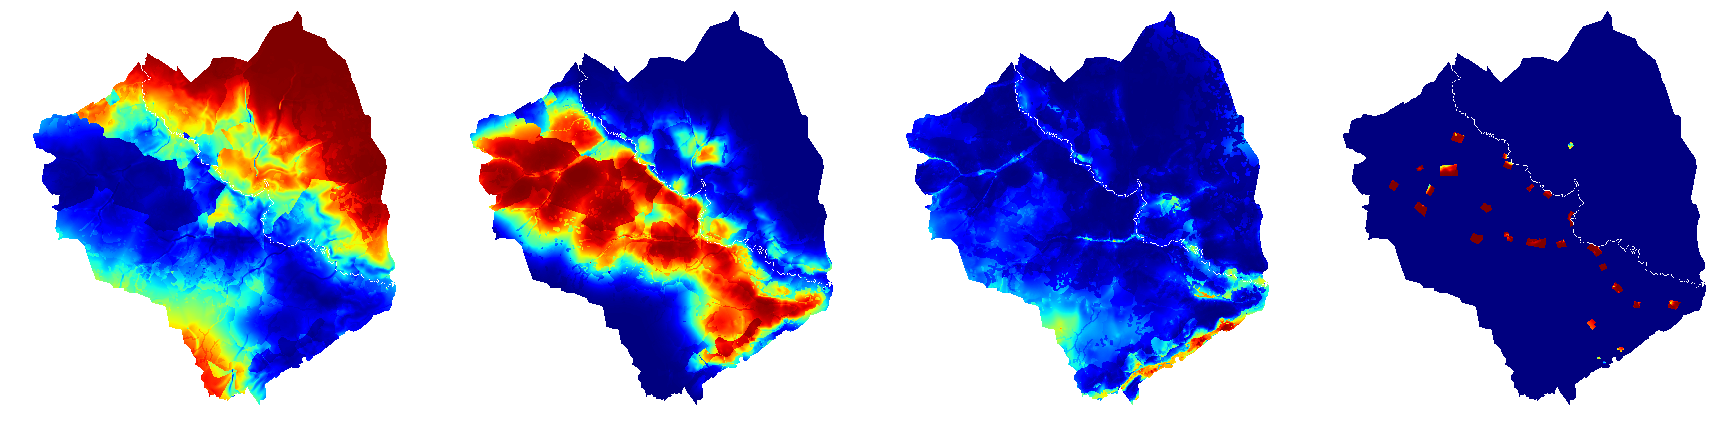

In [9]:
#посмотрим на них
#убираем nodata
P0[P0 == -99999.] = np.nan
P1[P1 == -99999.] = np.nan
P2[P2 == -99999.] = np.nan
P3[P3 == -99999.] = np.nan

#determine the size
mpl.rcParams['figure.figsize'] = (30,30)

plt.subplot(241)
plt.imshow(P0, cmap='jet')
plt.axis('off')

plt.subplot(242)
plt.imshow(P1, cmap='jet')
plt.axis('off')

plt.subplot(243)
plt.imshow(P2, cmap='jet')
plt.axis('off')

plt.subplot(244)
plt.imshow(P3, cmap='jet')
plt.axis('off')

Итак, растры вероятности мы создали и даже сохранили с нормальными шапками. Теперь загрузим их снова, уже как традиционные матрицы. Дополнительно подгрузим структуру землепользования, чтобы потом на её основе выстчитывать эластичность. 

In [10]:
#подгрузка вероятностей, землепользования на 1770 и пустого файла для лэнд юза
dataset = gdal.Open('Probability/lu1770_R.asc')
dataset0 = gdal.Open('Probability/P0.asc')
dataset1 = gdal.Open('Probability/P1.asc')
dataset2 = gdal.Open('Probability/P2.asc')
dataset3 = gdal.Open('Probability/P3.asc')
dataset4 = gdal.Open('Probability/Empty.asc')

Ах да, просто для сведения. Вот такой тип набора данных мы используем, и вот так они выглядят (матрица):

In [11]:
type(dataset)

osgeo.gdal.Dataset

In [12]:
# Матрица чисел
dataset.ReadAsArray()

array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],
      dtype=float32)

In [13]:
LU1770=dataset.ReadAsArray()

Сейчас начнётся страшная вещь (ну, не очень-то страшная, по правде). Приведу фрагмент главы из курсовой. 

При первой итерации в Python было произведено сравнение растров вероятностей разных типов землепользования и каждому пикселю было присвоено значение того типа, вероятность которого в этом пикселе была максимальна. Дополнительное преимущество отдавалось пикселям, уже занятым данным типом землепользования, численное значение этого преимущества (т.н. эластичность) определялось (не десь) по оригинальной формуле
$$ELAS=(|G-L|)/(G+L),$$                                                             
где G – число новых пикселей, перешедших в определённый тип землепользования, L – число пикселей, сменивших данный тип на другой. Таким образом, преимущество получали наиболее стабильные, привязанные к своим границам типы землепользования. Для прогностического моделирования следует использовать усреднённые значения прошлых лет, однако поскольку в данном случае моделирование охватывало первый период изменений, единственным источником значений эластичности оказались реальные данные. Поэтому значения G и L были получены путём обработки таблицы изменений с 1770 по 1860 год.
После первой итерации были рассчитаны доли каждого типа землепользования, и во время последующих итераций к вероятности недостаточно представленных типов увеличивались, а избыточно представленных – уменьшались на фиксированную величину. После этого производилось повторное присвоение каждому пикселю значений типов землепользования. Операция повторялась до тех пор, пока разница между размещённой и реальной долей не составляла менее 0.01. 

В целом, вся процедура повторяет принципы работы модели Dyna-CLUE: http://www.ivm.vu.nl/en/Organisation/departments/spatial-analysis-decision-support/Clue/index.aspx
(Вот только саму эту модель "развинтить" нельзя, а ошибок она выдает множество, поэтому и был "изобретён велосипед").

In [14]:
#открытие растров
P0=dataset0.ReadAsArray()
P1=dataset1.ReadAsArray()
P2=dataset2.ReadAsArray()
P3=dataset3.ReadAsArray()
LU=dataset4.ReadAsArray()
#ввод E0, E1, E2, E3
iter0=0
iter1=0
iter2=0
iter3=0
count=0
#ввод эластичностей
E0=0.026
E1=0.198
E2=0.175
E3=0.173
#добавление эластичностей в пикселях с опр. LU (поощряет сохранение в старых границах)
for i in range(0, Y):
    for j in range(0, X):
        if LU[i][j]==0:
            P0[i][j]+=E0
        if LU[i][j]==1:
            P1[i][j]+=E1
        if LU[i][j]==2:
            P2[i][j]+=E2
        if LU[i][j]==3:
            P3[i][j]+=E3
        else:
            continue
#несколько итераций
#ввод maxcount
maxcount=20000
while count<maxcount:
    #добавление итерационного параметра
    for i in range(0, Y):
        for j in range(0, X):
            if LU[i][j]!=-99999:
                P0[i][j]+=iter0
                P1[i][j]+=iter1
                P2[i][j]+=iter2
                P3[i][j]+=iter3
            else:
                continue
        #первичное распределение лэнд юза
    for i in range(0, Y):
            for j in range(0, X):
                if LU1770[i][j]!=-99999:
                    PG=max(P0[i][j],P1[i][j],P2[i][j],P3[i][j])
                    if P0[i][j]>=PG:
                        LU[i][j]=0
                    elif P1[i][j]>=PG:
                        LU[i][j]=1
                    elif P2[i][j]>=PG:
                        LU[i][j]=2
                    elif P3[i][j]>=PG:
                        LU[i][j]=3
                    else:
                        continue
                    if LU1770[i][j]==5:
                        LU[i][j]=5
                    else:
                        continue
                else:
                    LU[i][j]=-99999
    #подсчёт доли пикселей от общего LU
    uses=0
    forests=0
    fields=0
    meadows=0
    villages=0
    for i in range(0, Y):
        for j in range(0, X):
            if LU[i][j]!=-99999:
                uses+=1
            else:
                continue
            if LU[i][j]==0:
                forests+=1
            elif LU[i][j]==1:
                fields+=1
            elif LU[i][j]==2:
                meadows+=1
            elif LU[i][j]==3:
                villages+=1
            else:
                continue
    print ('Forests =', forests)
    print ('Fields =', fields)
    print ('Meadows =', meadows)
    print ('Villages =', villages)
    #определение разницы с демандом
    #ввод demand0, demand1, demand2, demand3
    demand0=0.565846639831452
    demand1=0.321369177966105
    demand2=0.0929488555875026
    demand3=0.0117194466149404
    diff0=demand0-forests/uses
    diff1=demand1-fields/uses
    diff2=demand2-meadows/uses
    diff3=demand3-villages/uses
    #выведем разницы
    print ('diff0 =', diff0)
    print ('diff1 =', diff1)
    print ('diff2 =', diff2)
    print ('diff3 =', diff3)
    check0=0
    check1=0
    check2=0
    check3=0
    if diff0>0.01 or diff0<-0.01: #число из головы - точность аллокации в процентах (1%)
        iter0=diff0 #may be replaced with a number
    else:
        check0=1
    if diff1>0.01 or diff1<-0.01: #число из головы (1%)
        iter1=diff1
    else:
        check1=1
    if diff2>0.01 or diff2<-0.01: #число из головы (1%)
        iter2=diff2
    else:
        check2=1
    if diff3>0.01 or diff3<-0.01: #число из головы (1%)
        iter3=diff3
    else:
        check3=1
    #находим подходящее распределение
    if check0==1 and check1==1 and check2==1 and check3==1:
        print ('success')
        break
    else:
        print ('one more')
    count+=1
#сохранение грида


Forests = 185505
Fields = 151249
Meadows = 14180
Villages = 3181
diff0 = 0.04592769455179635
diff1 = -0.10253972235788966
diff2 = 0.053206257576314135
diff3 = 0.00280398792145729
one more
Forests = 195762
Fields = 136317
Meadows = 18359
Villages = 3677
diff0 = 0.017180174960769623
diff1 = -0.06068947739998659
diff2 = 0.04149368232322834
diff3 = 0.0014138378076667766
one more
Forests = 197439
Fields = 127787
Meadows = 24134
Villages = 4755
diff0 = 0.01248001016071576
diff1 = -0.03678225870919405
diff2 = 0.025307962752381133
diff3 = -0.0016074965122247018
one more
Forests = 198576
Fields = 121581
Meadows = 28007
Villages = 5951
diff0 = 0.009293315242611344
diff1 = -0.019388565954790993
diff2 = 0.01445302043239996
diff3 = -0.0049595520285421486
one more
Forests = 200145
Fields = 118459
Meadows = 29387
Villages = 6124
diff0 = 0.004895844418947415
diff1 = -0.010638467859520884
diff2 = 0.01058526406741829
diff3 = -0.005444422935166662
one more
Forests = 201675
Fields = 116465
Meadows = 29797

In [15]:
#импорт созданного грида (без привязки!)
#координаты добавлены вручную
np.savetxt('C:/Users/olegz/Desktop/CLUE/Lesunovo PROJECT/Predicted/Predicted1860.asc', LU, fmt='%4.1f', comments='', header='NCOLS 736 \nNROWS 800 \nXLLCORNER 609465.0000000000 \nYLLCORNER 6099795.0000000000 \nCELLSIZE 30.000000 \nNODATA_VALUE -99999.0')

In [34]:
#подготовка к быстрой визуализации в Питоне
#adding real landuse
dataset19 = gdal.Open('Probability/lu1860_R.asc')
LU1860=dataset19.ReadAsArray()

#убираем nodata
LU1860[LU1860 == -99999.] = np.nan
LU1770[LU1770 == -99999.] = np.nan
LU[LU == -99999.] = np.nan

(-0.5, 735.5, 799.5, -0.5)

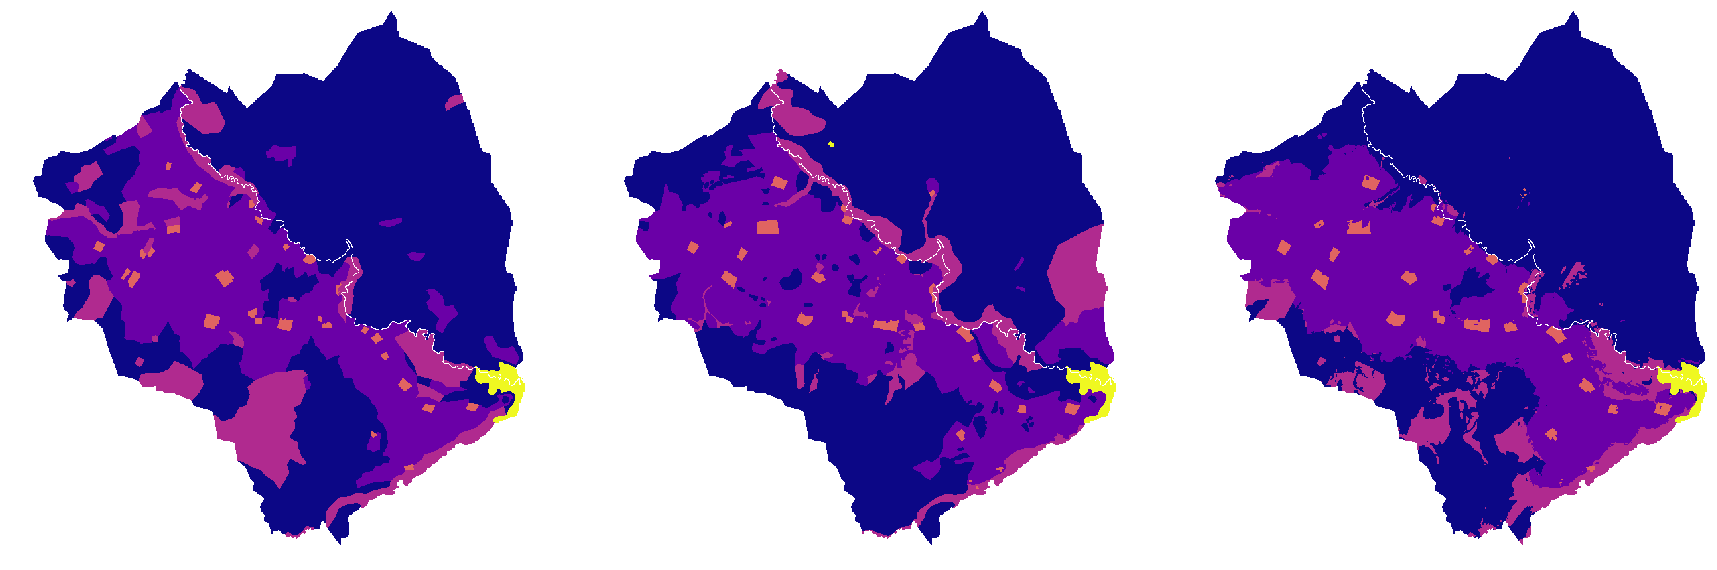

In [35]:
mpl.rcParams['figure.figsize'] = (30,30)

#real LU 1770
plt.subplot(231)
plt.imshow(LU1770, cmap='plasma')
plt.axis('off')

#real LU 1860
plt.subplot(232)
plt.imshow(LU1860, cmap='plasma')
plt.axis('off')

#modelled LU 1860
plt.subplot(233)
plt.imshow(LU, cmap='plasma')
plt.axis('off')

In [102]:
#неудачная попытка сохранить сразу в АркГИСовский файл. Какая-то ошибка gdal...
#from osgeo import gdal_array 
#import array
#driver = gdal.GetDriverByName("ESRI Shapefile")
#datatype=gdal.GDT_Float32
#new_dataset = driver.Create('Probability/Predicted1860.asc', dataset.RasterXSize, dataset.RasterYSize, datatype)
#new_dataset.SetProjection(dataset.GetProjection())
#new_dataset.SetGeoTransform(dataset.GetGeoTransform())
#new_dataset.WriteArray(LU)